<font size="+3"><strong>Taiwanese Bankruptcy Prediction 🇹🇼</strong></font>

In [ ]:
__author__ = "Donald Ghazi"
__email__ = "donald@donaldghazi.com"
__website__ = "donaldghazi.com"

In [61]:
import gzip
import json
import pickle
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from ipywidgets import interact
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

# Prepare Data

## Import

I'll load the contents of the `"data/taiwan-bankruptcy-data.json.gz"` and assign it to the variable <code>taiwan_data</code>. 

<code>taiwan_data</code> should be a dictionary. I'll create a DataFrame in this project.

In [62]:
%%bash

cd data
gzip -dkf taiwan-bankruptcy-data.json.gz

In [63]:
# Open file and load JSON
with gzip.open("data/taiwan-bankruptcy-data.json.gz", "r") as read_file:
    taiwan_data = json.load(read_file)
print(type(taiwan_data))

<class 'dict'>


In [64]:
# Extract the key names from taiwan_data and assign them to the variable taiwan_data_keys
taiwan_data_keys = taiwan_data.keys()
print(taiwan_data_keys)

dict_keys(['schema', 'metadata', 'observations'])


Now I want to calculate how many companies are in `taiwan_data` and assign the result to `n_companies`. 

In [65]:
taiwan_data.keys()

dict_keys(['schema', 'metadata', 'observations'])

In [66]:
type(taiwan_data["observations"])

list

In [67]:
taiwan_data["observations"][0]

{'id': 1,
 'bankrupt': True,
 'feat_1': 0.3705942573,
 'feat_2': 0.4243894461,
 'feat_3': 0.4057497725,
 'feat_4': 0.6014572133,
 'feat_5': 0.6014572133,
 'feat_6': 0.9989692032,
 'feat_7': 0.7968871459,
 'feat_8': 0.8088093609,
 'feat_9': 0.3026464339,
 'feat_10': 0.7809848502,
 'feat_11': 0.0001256969,
 'feat_12': 0.0,
 'feat_13': 0.4581431435,
 'feat_14': 0.0007250725,
 'feat_15': 0.0,
 'feat_16': 0.1479499389,
 'feat_17': 0.1479499389,
 'feat_18': 0.1479499389,
 'feat_19': 0.1691405881,
 'feat_20': 0.3116644267,
 'feat_21': 0.0175597804,
 'feat_22': 0.0959205276,
 'feat_23': 0.1387361603,
 'feat_24': 0.0221022784,
 'feat_25': 0.8481949945,
 'feat_26': 0.6889794628,
 'feat_27': 0.6889794628,
 'feat_28': 0.2175353862,
 'feat_29': 4980000000.0,
 'feat_30': 0.0003269773,
 'feat_31': 0.2630999837,
 'feat_32': 0.363725271,
 'feat_33': 0.0022589633,
 'feat_34': 0.0012077551,
 'feat_35': 0.629951302,
 'feat_36': 0.0212659244,
 'feat_37': 0.2075762615,
 'feat_38': 0.7924237385,
 'feat_39': 

In [68]:
len(taiwan_data["observations"])

6137

In [69]:
# Calculate how many companies are in taiwan_data and assign the result to n_companies
n_companies = len(taiwan_data["observations"])
print(n_companies)

6137


Now, I want to calculate the number of features associated with each company and assign the result to `n_features`.

In [70]:
type(taiwan_data["observations"])

list

In [71]:
taiwan_data["observations"][0]

{'id': 1,
 'bankrupt': True,
 'feat_1': 0.3705942573,
 'feat_2': 0.4243894461,
 'feat_3': 0.4057497725,
 'feat_4': 0.6014572133,
 'feat_5': 0.6014572133,
 'feat_6': 0.9989692032,
 'feat_7': 0.7968871459,
 'feat_8': 0.8088093609,
 'feat_9': 0.3026464339,
 'feat_10': 0.7809848502,
 'feat_11': 0.0001256969,
 'feat_12': 0.0,
 'feat_13': 0.4581431435,
 'feat_14': 0.0007250725,
 'feat_15': 0.0,
 'feat_16': 0.1479499389,
 'feat_17': 0.1479499389,
 'feat_18': 0.1479499389,
 'feat_19': 0.1691405881,
 'feat_20': 0.3116644267,
 'feat_21': 0.0175597804,
 'feat_22': 0.0959205276,
 'feat_23': 0.1387361603,
 'feat_24': 0.0221022784,
 'feat_25': 0.8481949945,
 'feat_26': 0.6889794628,
 'feat_27': 0.6889794628,
 'feat_28': 0.2175353862,
 'feat_29': 4980000000.0,
 'feat_30': 0.0003269773,
 'feat_31': 0.2630999837,
 'feat_32': 0.363725271,
 'feat_33': 0.0022589633,
 'feat_34': 0.0012077551,
 'feat_35': 0.629951302,
 'feat_36': 0.0212659244,
 'feat_37': 0.2075762615,
 'feat_38': 0.7924237385,
 'feat_39': 

In [72]:
len(taiwan_data["observations"][0])

97

In [73]:
# Calculate the number of features associated with each company and assign the result to n_features
n_features = len(taiwan_data["observations"][0])
print(n_features)

97


I can now create a `wrangle` function that takes as input the path of a compressed JSON file and returns the file's contents as a DataFrame. The index of the DataFrame contains the ID of the companies. When my function is complete, I'll use it to load the data into the DataFrame `df`.

In [74]:
# Iterate through companies
for item in taiwan_data["observations"]:
    if len(item) !=97:
        print("ALERT!!")

In [75]:
# Open compressed file and load contents
with gzip.open("data/taiwan-bankruptcy-data.json.gz", "r") as read_file:
    taiwan_data_gz = json.load(read_file)

print(type(taiwan_data_gz))

<class 'dict'>


In [76]:
# Explore taiwan_data_gz`
print(taiwan_data_gz.keys())
print(len(taiwan_data_gz["observations"]))
print(len(taiwan_data_gz["observations"][0]))

dict_keys(['schema', 'metadata', 'observations'])
6137
97


In [77]:
df = pd.DataFrame().from_dict(taiwan_data_gz["observations"]).set_index("id")
print(df.shape)
df.head()

(6137, 96)


,bankrupt,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
id,,,,,,,,,,,,,,,,,,,,,
1,True,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
2,True,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
3,True,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
4,True,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
5,True,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [78]:
# Create wrangle function
def wrangle(filename):
    # Open compressed file, load into dict
    with gzip.open(filename, "r") as f:
        data = json.load(f)
        
    # Turn dict into DataFrame
    df = pd.DataFrame().from_dict(data["observations"]).set_index("id")
    
    return df

In [79]:
df = wrangle("data/taiwan-bankruptcy-data.json.gz")
print("df shape:", df.shape)
df.head()

df shape: (6137, 96)


,bankrupt,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
id,,,,,,,,,,,,,,,,,,,,,
1,True,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
2,True,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
3,True,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
4,True,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
5,True,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Explore

I want to see if there any missing data in the dataset. I can then create a Series where the index contains the name of the columns in `df` and the values are the number of <code>NaN</code>s in each column. Then I will assign the result to <code>nans_by_col</code>. Neither the Series itself nor its index require a name. 

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6137 entries, 1 to 6819
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bankrupt  6137 non-null   bool   
 1   feat_1    6137 non-null   float64
 2   feat_2    6137 non-null   float64
 3   feat_3    6137 non-null   float64
 4   feat_4    6137 non-null   float64
 5   feat_5    6137 non-null   float64
 6   feat_6    6137 non-null   float64
 7   feat_7    6137 non-null   float64
 8   feat_8    6137 non-null   float64
 9   feat_9    6137 non-null   float64
 10  feat_10   6137 non-null   float64
 11  feat_11   6137 non-null   float64
 12  feat_12   6137 non-null   float64
 13  feat_13   6137 non-null   float64
 14  feat_14   6137 non-null   float64
 15  feat_15   6137 non-null   float64
 16  feat_16   6137 non-null   float64
 17  feat_17   6137 non-null   float64
 18  feat_18   6137 non-null   float64
 19  feat_19   6137 non-null   float64
 20  feat_20   6137 non-null   floa

In [81]:
df.isnull().sum().sum()

0

In [82]:
df.nunique()

bankrupt       2
feat_1      3159
feat_2      2985
feat_3      2984
feat_4      3580
            ... 
feat_91     6136
feat_92     5599
feat_93     5608
feat_94        1
feat_95     6137
Length: 96, dtype: int64

In [83]:
df.isna().sum()

bankrupt    0
feat_1      0
feat_2      0
feat_3      0
feat_4      0
           ..
feat_91     0
feat_92     0
feat_93     0
feat_94     0
feat_95     0
Length: 96, dtype: int64

In [84]:
nans_by_col = pd.Series(df.isna().sum())
print("nans_by_col shape:", nans_by_col.shape)
nans_by_col.head()

nans_by_col shape: (96,)


bankrupt    0
feat_1      0
feat_2      0
feat_3      0
feat_4      0
dtype: int64

To see if the data imbalanced, I can create a bar chart that shows the normalized value counts for the column `df["bankrupt"]`.

In [85]:
df["bankrupt"].value_counts()

False    5947
True      190
Name: bankrupt, dtype: int64

In [86]:
df["bankrupt"].value_counts(normalize=True)

False    0.96904
True     0.03096
Name: bankrupt, dtype: float64

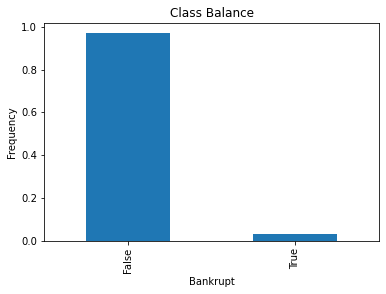

In [87]:
# Plot class balance
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Bankrupt",  # Label x-axis "Bankrupt"
    ylabel="Frequency", # Label y-axis "Frequency"
    title="Class Balance" # Title "Chart Balance"
);

## Split

In [88]:
# Create my feature matrix X and target vector y
target = "bankrupt" # My target is "bankrupt"
X = df.drop(columns="bankrupt") # Drop column with multicollinearity in the feature matrix
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6137, 95)
y shape: (6137,)


In [89]:
# Divide my dataset into training and test sets using a randomized split
X_train, X_test, y_train, y_test =  train_test_split(
    X, y, test_size=0.2, random_state=42   # My test set should be 20% of my data & set random_state to 42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4909, 95)
y_train shape: (4909,)
X_test shape: (1228, 95)
y_test shape: (1228,)


## Resample

In [90]:
# Create a new feature matrix X_train_over and target vector y_train_over by performing random over-sampling on the training data
over_sampler = RandomOverSampler(random_state=42) # Set the random_state to 42
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (9512, 95)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,0.535855,0.599160,0.594411,0.627099,0.627099,0.999220,0.797686,0.809591,0.303518,0.781865,...,0.834091,0.022025,0.624364,0.627101,0.841977,0.275384,0.026791,0.565158,1,0.147943
1,0.554136,0.612734,0.595000,0.607388,0.607388,0.999120,0.797614,0.809483,0.303600,0.781754,...,0.840293,0.002407,0.624548,0.607385,0.842645,0.276532,0.026791,0.565158,1,0.062544
2,0.549554,0.603467,0.599122,0.620166,0.620166,0.999119,0.797569,0.809470,0.303524,0.781740,...,0.840403,0.000840,0.624010,0.620163,0.842873,0.277249,0.026800,0.565200,1,0.047929
3,0.543801,0.603249,0.606992,0.622515,0.622515,0.999259,0.797728,0.809649,0.303510,0.781930,...,0.831514,0.006176,0.626775,0.622513,0.842989,0.280013,0.026839,0.565375,1,0.028386
4,0.498659,0.562364,0.546978,0.603670,0.603670,0.998904,0.797584,0.809459,0.304000,0.781713,...,0.811988,0.004256,0.623674,0.603669,0.841105,0.277628,0.026897,0.565618,1,0.043080


# Build Model

## Baseline

In [91]:
# Calculate the baseline accuracy score for my model
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9688


## Iterate

**Gradient Boosting Trees**

In [92]:
# Create a classifier clf that can be trained on (X_train_over, y_train_over)
clf = RandomForestClassifier(random_state=42)
print(clf)

RandomForestClassifier(random_state=42)


In [93]:
# Perform cross-validation with my classifier using the over-sampled training data, and assign my results to cv_scores
cv_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)  # Set the cv argument to 5
print(cv_scores)

[0.99316868 0.99474514 0.99369085 0.99369085 0.9957939 ]


In [94]:
# Create a dictionary params with the range of hyperparameters that I want to evaluate for my classifier
params = {
    "n_estimators": range(25, 100, 25),
    "max_depth": range(10, 50, 10)


}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 50, 10)}

In [95]:
# Create a GridSearchCV named model that includes my classifier and hyperparameter grid
model = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=1) # Set cv to 5, n_jobs to -1, and verbose to 1
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [96]:
# Fit my model to the over-sampled training data
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [97]:
# Extract the cross-validation results from my model, and load them into a DataFrame named cv_results
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.466611,0.030509,0.006319,0.002242,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.981608,0.980032,0.979495,0.981073,0.980547,0.980551,0.000745,11
1,0.906622,0.022882,0.009819,0.002386,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.983184,0.981608,0.977918,0.980021,0.981073,0.980761,0.001750,10
2,1.409413,0.038556,0.013992,0.002892,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.983184,0.981083,0.977392,0.979495,0.981073,0.980445,0.001925,12
3,0.566776,0.029568,0.008576,0.002357,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.990541,0.986863,0.985804,0.990011,0.989485,0.988541,0.001863,9
4,1.125918,0.056730,0.014820,0.003020,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.990541,0.990016,0.987907,0.990011,0.990011,0.989697,0.000918,7


In [98]:
# Extract the best hyperparameters from my model and assign them to best_params
best_params = model.best_params_
print(best_params)

{'max_depth': 40, 'n_estimators': 75}


## Evaluate

In [99]:
# Test the quality of my model by calculating accuracy scores for the training and test data
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.9764


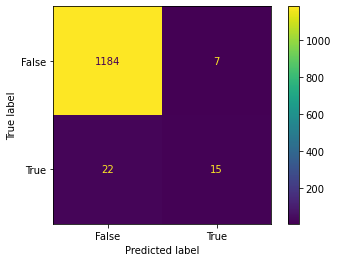

In [100]:
# Plot a confusion matrix that shows how my model performed on my test set
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [101]:
# Generate a classification report for my model's performance on the test data and assign it to class_report
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      1191
        True       0.68      0.41      0.51        37

    accuracy                           0.98      1228
   macro avg       0.83      0.70      0.75      1228
weighted avg       0.97      0.98      0.97      1228



# Communicate

I will create a horizontal bar chart with the 10 most important features for my model.

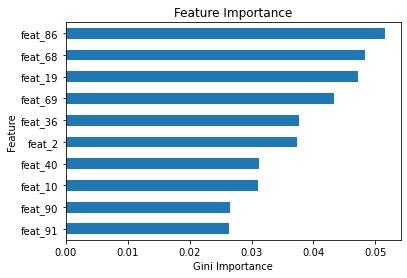

In [102]:
# Get feature names from training data
features = X_train_over.columns

# Extract importances from model
importances = model.best_estimator_.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()

# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [103]:
# Save my best-performing model to a a file named "model-5-5.pkl"
with open("model-5-5.pkl", "wb") as f:
    pickle.dump(model, f)

Now, I can open the file <code>my_predictor_taiwan.py</code>. Add my `wrangle` function, and then create a `make_predictions` function that takes two arguments: `data_filepath` and <code>model_filepath</code>.

In [1]:
%%bash

cat my_predictor_taiwan.py

# Import libraries
import gzip
import json
import pickle
import pandas as pd

def wrangle(filename):
    # Open compressed file, load into dict
    with gzip.open(filename, "r") as f:
        data = json.load(f)
        
    # Turn dict into DataFrame
    df = pd.DataFrame().from_dict(data["observations"]).set_index("id")
    
    return df


def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = wrangle(data_filepath)
    # Load model
    with open(model_filepath, "rb") as f:
        model = pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series w/ name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name="bankrupt")
    return y_test_pred

In [111]:
# Import my module
from my_predictor_taiwan import make_predictions

# Generate predictions
y_test_pred = make_predictions(
    data_filepath="data/taiwan-bankruptcy-data-test-features.json.gz",
    model_filepath="model-5-5.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (682,)


id
18    False
20    False
24    False
32    False
38    False
Name: bankrupt, dtype: bool